<a href="https://colab.research.google.com/github/vikasnain6353/ai-ml-intern/blob/main/task_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [8]:
df = pd.read_csv("/content/heart.csv")
X = df.drop("target", axis=1)
y = df["target"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

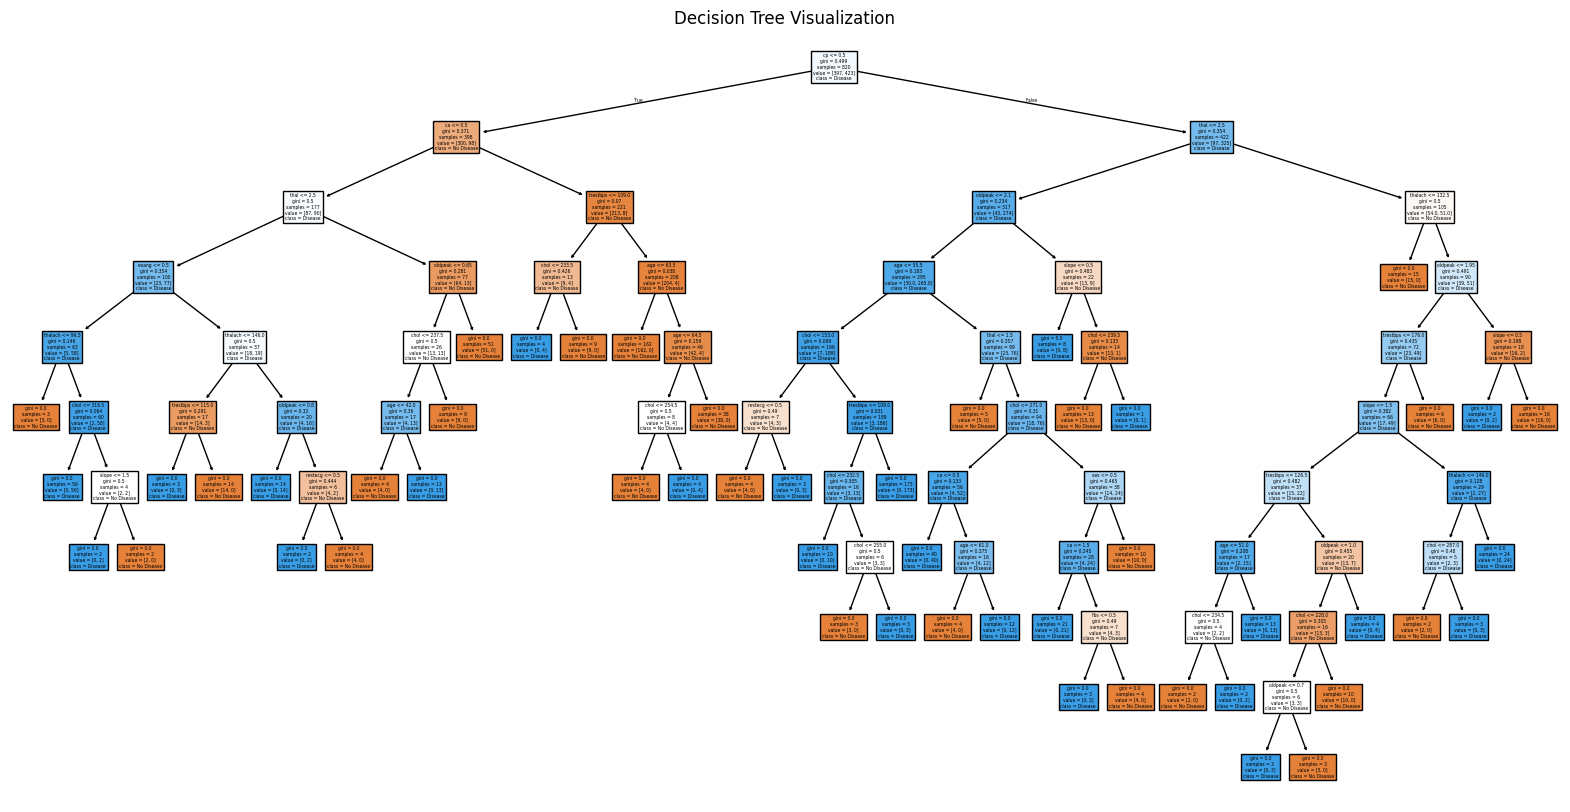

In [10]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [11]:
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)

print("Decision Tree (Full Depth):")
print("Train Accuracy:", accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, dt.predict(X_test)))

print("\nDecision Tree (Pruned, depth=3):")
print("Train Accuracy:", accuracy_score(y_train, dt_pruned.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, dt_pruned.predict(X_test)))

Decision Tree (Full Depth):
Train Accuracy: 1.0
Test Accuracy : 0.9853658536585366

Decision Tree (Pruned, depth=3):
Train Accuracy: 0.8512195121951219
Test Accuracy : 0.7804878048780488


In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("\nRandom Forest:")
print("Train Accuracy:", accuracy_score(y_train, rf.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, rf.predict(X_test)))


Random Forest:
Train Accuracy: 1.0
Test Accuracy : 0.9853658536585366


In [13]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances (Random Forest):")
print(importances)


Feature Importances (Random Forest):
cp          0.135072
ca          0.127327
thalach     0.122169
oldpeak     0.121905
thal        0.110518
age         0.077908
chol        0.074822
trestbps    0.071171
exang       0.057594
slope       0.045782
sex         0.028731
restecg     0.018557
fbs         0.008444
dtype: float64


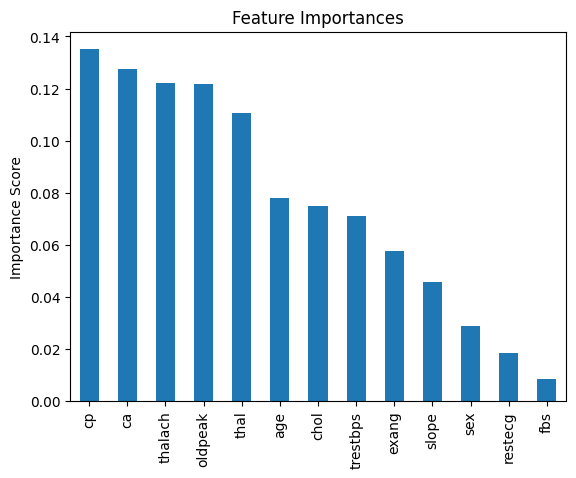

In [14]:
importances.plot(kind='bar', title='Feature Importances')
plt.ylabel("Importance Score")
plt.show()

In [15]:
dt_cv_score = cross_val_score(dt, X, y, cv=5).mean()
rf_cv_score = cross_val_score(rf, X, y, cv=5).mean()

print("\nCross-Validation Scores (5-Fold):")
print("Decision Tree:", dt_cv_score)
print("Random Forest:", rf_cv_score)


Cross-Validation Scores (5-Fold):
Decision Tree: 1.0
Random Forest: 0.9970731707317073


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, rf.predict(X_test)))
print(classification_report(y_test, rf.predict(X_test)))

[[102   0]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

